In [95]:
from initial_classif.trainset.variable_training_sets import *
from initial_classif.trainset.gaia_extraction import *
import sys
from astropy.coordinates import SkyCoord
import astropy.units as u
sys.path.append('../../../')
from virac_utils import wsdb_kwargs, wrap, betw

config.config_['general']['password']=wsdb_kwargs['password']
del wsdb_kwargs['password']

from interface_utils import light_curve_loader
ll = light_curve_loader.lightcurve_loader()

In [127]:
### Good for stage 1
lcentre, bcentre, test_sizel, test_sizeb = 1.275,-0.385, 0.09*60., 0.09*60

## Binary classification

In [47]:
v = load_all_variable_stars(**wsdb_kwargs).sort_values(by='virac2_id').reset_index(drop=True)
# c = SkyCoord(ra=v['ra']*u.deg, dec=v['dec']*u.deg, frame='icrs').transform_to('galactic')
# v['l'], v['b'] = c.l.deg, c.b.deg
# v = v[betw(v['l'],lcentre-test_sizel*.5/60.,lcentre+test_sizel*.5/60.) & betw(v['b'],bcentre-test_sizeb*.5/60.,lcentre+test_sizeb*.5/60.)].reset_index(drop=True)
v[['virac2_id','var_class']].groupby('var_class').agg('count')


,virac2_id
var_class,
CEP,37
DSCT,10
EA/EB,20470
EW,5198
Ell,1432
MIRA,13
OSARG,1970
RRab,1592
RRc,639


In [191]:
g = generate_gaia_training_set(lcentre, bcentre, test_sizel, test_sizeb, 50., **wsdb_kwargs)

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))


(-0.5, 0.5)

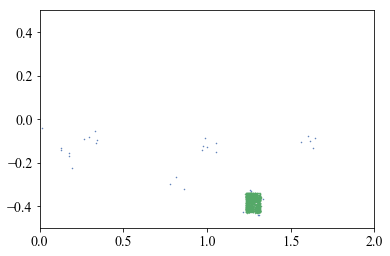

In [132]:
c = SkyCoord(ra=v['ra']*u.deg, dec=v['dec']*u.deg, frame='icrs').transform_to('galactic')
v['l'], v['b'] = c.l.deg, c.b.deg
plt.plot(wrap(v['l']),v['b'],'.',ms=1)
plt.plot(wrap(g['l']),g['b'],'.',ms=1)
# plt.xlim(260.,270.)
# plt.ylim(-30,-25)
plt.xlim(0.,2.)
plt.ylim(-0.5,0.5)

In [193]:
v['class']='VAR'
g['class']='CONST'
full_data = pd.concat([v, g], axis=0, sort=False)

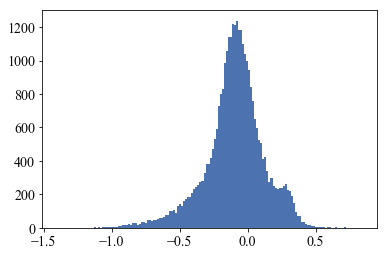

In [195]:
plt.hist(np.log10(full_data['ks_p100_p0']),bins=150);

In [196]:
from initial_classif.classifier.classifier import binary_classification
classfier = binary_classification(full_data)

       ks_pspl_mean_loglike_outside_three_te
class                                       
CONST                                    722
VAR                                    25708
ks_stdev 32319
ks_mad 32277
ks_kurtosis 32216
ks_skew 32176
ks_p100_p0 32143
ks_p99_p1 32126
ks_p95_p5 32116
ks_p84_p16 32110
ks_p75_p25 32104
302 sources removed from clip.
32104 sources left
       ks_p95_p5
class           
CONST        907
VAR        31197


In [198]:
classfier.cm

array([[  211,   696],
       [ 1107, 30090]])

In [199]:
classfier.cr

'              precision    recall  f1-score   support\n\n       CONST       0.16      0.23      0.19       907\n         VAR       0.98      0.96      0.97     31197\n\n    accuracy                           0.94     32104\n   macro avg       0.57      0.60      0.58     32104\nweighted avg       0.95      0.94      0.95     32104\n'

In [210]:
grid_from_pickle = pickle.load(open('/local/scratch_2/jls/virac_classifier/binary/grid_test.pkl', 'rb'))
classifier_from_pickle = pickle.load(open('/local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl', 'rb'))

In [211]:
grid_from_pickle

,b,index,l
0,-0.385,0,1.275


In [217]:
import sys
sys.getsizeof(classifier_from_pickle.model)

56

## Variable classification

In [197]:
### Good for stage 2
lcentre, bcentre, test_sizel, test_sizeb = 0.787411, -0.054603, 0.09*60., 0.09*60

In [107]:
lc = ll(g['sourceid'])

/data/jls/virac/n512_2318830.hdf5
